Метод Эйлера для рассчета нескольких мат. маятников

In [1]:
#Импортируем нужные библиотеки 

import os
import sys
import random
import warnings


import numpy as np
import scipy

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.cm import get_cmap

import mplcyberpunk
plt.style.use('cyberpunk')

warnings.filterwarnings('ignore')


In [2]:
class MultiPendulum(object):

    def __init__(self,
                 N : int = 9,
                 t_max : float = 20.,
                 dt : float = 0.05):

        r"""
        Класс для рассчета нескольких мат маятников методом Эйлера
        Атрибуты для инициализации:
            - N - количество маятников
            - t_max - правый конец временного интервала
            - dt - шаг по времени
        """

        self.g = 9.81
        self.N = N 
        self.lengths = np.linspace(1.5, 2.0, self.N)                      
        self.angles_grid = np.linspace(np.pi / 6, 1.05*np.pi / 6, self.N)
        self.angles = np.array([random.choice(self.angles_grid) for i in range(self.N)])# Начальные углы для каждого маятника
        
        self.angular_velocities = np.zeros(self.N)                        # Задаем начальную скорость
        
        self.t_max   = t_max
        self.dt      = dt
        self.n_steps = int(self.t_max / self.dt)


    def init_func(self):

        r"""
        Функция инициализации для визуализационного ряда
        """
        
        for line, bob in zip(self.lines, self.bobs):
            line.set_data([], [])
            bob.set_data([], [])
        
        return self.lines + self.bobs


    def update(self,
               frame):

        r"""
        Функция для обновления фреймов визуализационного ряда
        """
        
        for j in range(self.N):
            x = self.lengths[j] * np.sin(self.angles_history[j, frame])
            y = -self.lengths[j] * np.cos(self.angles_history[j, frame])
            
            self.lines[j].set_data([0, x], [0, y])
            self.bobs[j].set_data(x, y)
        
        return self.lines + self.bobs

    
    def ExplicitEuler(self):
        r"""
        Функция "прямого" шага метода Эйлера
        """

        
        self.angles_history = np.zeros((self.N, self.n_steps))
        
        self.angles_history[:, 0] = self.angles
        
        # Цикл для рассчета
        for i in range(1, self.n_steps):
            for j in range(self.N):
                self.angular_acceleration = - (self.g / self.lengths[j]) * np.sin(self.angles_history[j, i - 1])
                
                self.angular_velocities[j] += self.angular_acceleration * self.dt
                self.angles_history[j, i] = self.angles_history[j, i - 1] + self.angular_velocities[j] * self.dt

        #Инициализируем пространство для графика
        fig, ax = plt.subplots()
        ax.set_xlim(-1.5, 1.5)
        ax.set_ylim(-2.5, 0.2)
        ax.grid(color = 'black', alpha = 0.25)
        
        #Раскраска
        cmap = get_cmap('winter')  
        colors = [cmap(i / (self.N - 1)) for i in range(self.N)]  
        
        self.lines = [ax.plot([], [], lw=1, color=colors[i])[0] for i in range(self.N)]
        self.bobs = [ax.plot([], [], 'o', color=colors[i], markersize=12)[0] for i in range(self.N)]

        ani = FuncAnimation(fig, self.update, frames=self.n_steps, init_func=self.init_func, blit=True, interval=50)

        ani.save('multiple_pendulumns_results_Rodionov626.gif', writer='pillow', fps=20)
        
        plt.show()

In [3]:
MultiPendulum_instance = MultiPendulum()

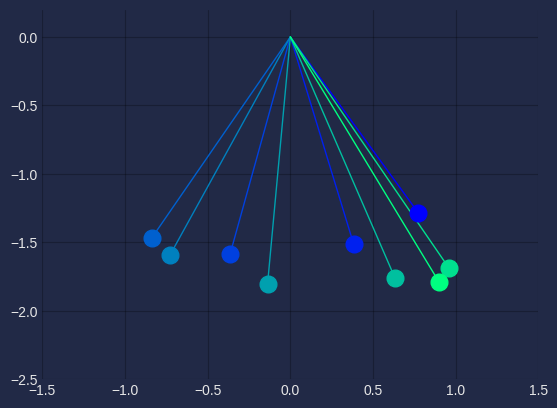

In [4]:
MultiPendulum_instance.ExplicitEuler()